In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku CSV
data = pd.read_csv('jobs_in_data.csv')

# Podstawowe informacje o danych
print(data.info())
print(data.describe())

# Wyświetlenie podstawowych informacji o danych (pierwsze 5 wierszy)
print(data.head())

# Wyświetlenie nazw kolumn
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.51947

In [38]:
# Obliczenie podstawowych statystyk dla kolumny salary_in_usd
mean_salary = round(data['salary_in_usd'].mean(), 2)
median_salary = round(data['salary_in_usd'].median(), 2)
min_salary = data['salary_in_usd'].min()
max_salary = data['salary_in_usd'].max()
std_salary = round(data['salary_in_usd'].std(), 2)
record_count = len(data)

print(f"Liczba rekordów: {record_count}")
print(f"Średnia: {mean_salary}, Mediana: {median_salary}, Min: {min_salary}, Max: {max_salary}, Odchylenie standardowe: {std_salary}")


Liczba rekordów: 9355
Średnia: 150299.5, Mediana: 143000.0, Min: 15000, Max: 450000, Odchylenie standardowe: 63177.37


In [39]:
# Zmiana wszystkich nazw stanowisk na wielkie litery
data['job_title_upper'] = data['job_title'].str.upper()

# Wyświetlenie długości nazw stanowisk
data['job_title_length'] = data['job_title'].apply(len)
print(data[['job_title_upper', 'job_title_length']].head())


        job_title_upper  job_title_length
0  DATA DEVOPS ENGINEER                20
1        DATA ARCHITECT                14
2        DATA ARCHITECT                14
3        DATA SCIENTIST                14
4        DATA SCIENTIST                14


In [40]:
# Wyciągnięcie wszystkich wierszy dla kolumn job_title, salary_in_usd, experience_level
subset_data = data[['job_title', 'salary_in_usd', 'experience_level']]
print(subset_data)

# Iteracja przez wszystkie wiersze i wyświetlenie wartości salary_in_usd
for i in range(10): #dla wszystkich wierszy -> len(data)
    salary = data['salary_in_usd'][i]
    print(f"Wiersz {i+1}: Wynagrodzenie: {salary} USD")


                     job_title  salary_in_usd experience_level
0         Data DevOps Engineer          95012        Mid-level
1               Data Architect         186000           Senior
2               Data Architect          81800           Senior
3               Data Scientist         212000           Senior
4               Data Scientist          93300           Senior
...                        ...            ...              ...
9350           Data Specialist         165000           Senior
9351            Data Scientist         412000           Senior
9352  Principal Data Scientist         151000        Mid-level
9353            Data Scientist         105000      Entry-level
9354     Business Data Analyst         100000      Entry-level

[9355 rows x 3 columns]
Wiersz 1: Wynagrodzenie: 95012 USD
Wiersz 2: Wynagrodzenie: 186000 USD
Wiersz 3: Wynagrodzenie: 81800 USD
Wiersz 4: Wynagrodzenie: 212000 USD
Wiersz 5: Wynagrodzenie: 93300 USD
Wiersz 6: Wynagrodzenie: 130000 USD
Wiersz

In [41]:
# Funkcja sprawdzająca, czy wynagrodzenie jest powyżej czy poniżej średniej
def compare_to_mean(salary, mean_salary):
    if salary > mean_salary:
        return "Powyżej średniej"
    else:
        return "Poniżej średniej"

# Zastosowanie funkcji dla każdego wiersza
data['salary_comparison'] = data['salary_in_usd'].apply(lambda x: compare_to_mean(x, mean_salary))
print(data[['job_title', 'salary_in_usd', 'salary_comparison']])
# Jupyter automatycznie ogranicza wyświetlanie dużych zestawów danych, aby poprawić czytelność.

                     job_title  salary_in_usd salary_comparison
0         Data DevOps Engineer          95012  Poniżej średniej
1               Data Architect         186000  Powyżej średniej
2               Data Architect          81800  Poniżej średniej
3               Data Scientist         212000  Powyżej średniej
4               Data Scientist          93300  Poniżej średniej
...                        ...            ...               ...
9350           Data Specialist         165000  Powyżej średniej
9351            Data Scientist         412000  Powyżej średniej
9352  Principal Data Scientist         151000  Powyżej średniej
9353            Data Scientist         105000  Poniżej średniej
9354     Business Data Analyst         100000  Poniżej średniej

[9355 rows x 3 columns]


#### Analiza wynagrodzeń a poziom doświadczenia

In [43]:
# Lista poziomów doświadczenia
experience_levels = data['experience_level'].unique()

# Obliczanie średnich wynagrodzeń dla każdego poziomu doświadczenia za pomocą pętli
for level in experience_levels:
    total_salary = 0
    count = 0
    
    # Przejście przez wszystkie wiersze
    for i in range(len(data)):
        if data['experience_level'][i] == level:
            total_salary += data['salary_in_usd'][i]
            count += 1
    
    # Obliczanie średniego wynagrodzenia
    average_salary = total_salary / count if count > 0 else 0
    print(f'Poziom doświadczenia: {level}, Średnie wynagrodzenie: {average_salary:.2f} USD')


Poziom doświadczenia: Mid-level, Średnie wynagrodzenie: 117523.92 USD
Poziom doświadczenia: Senior, Średnie wynagrodzenie: 162356.13 USD
Poziom doświadczenia: Executive, Średnie wynagrodzenie: 189462.91 USD
Poziom doświadczenia: Entry-level, Średnie wynagrodzenie: 88534.78 USD


#### Wynagrodzenie a lokalizacja firmy

In [45]:
# Lista unikalnych lokalizacji pracowników
locations = data['employee_residence'].unique()

# Obliczanie średnich wynagrodzeń dla każdej lokalizacji za pomocą pętli
for location in locations:
    total_salary = 0
    count = 0
    
    # Przejście przez wszystkie wiersze
    for i in range(len(data)):
        if data['employee_residence'][i] == location:
            total_salary += data['salary_in_usd'][i]
            count += 1
    
    # Obliczanie średniego wynagrodzenia
    average_salary = total_salary / count if count > 0 else 0
    print(f'Lokalizacja: {location}, Średnie wynagrodzenie: {average_salary:.2f} USD')


Lokalizacja: Germany, Średnie wynagrodzenie: 97640.64 USD
Lokalizacja: United States, Średnie wynagrodzenie: 158586.13 USD
Lokalizacja: United Kingdom, Średnie wynagrodzenie: 104920.30 USD
Lokalizacja: Canada, Średnie wynagrodzenie: 144743.01 USD
Lokalizacja: Spain, Średnie wynagrodzenie: 58084.94 USD
Lokalizacja: Ireland, Średnie wynagrodzenie: 110236.88 USD
Lokalizacja: South Africa, Średnie wynagrodzenie: 100492.50 USD
Lokalizacja: Poland, Średnie wynagrodzenie: 57253.36 USD
Lokalizacja: France, Średnie wynagrodzenie: 80700.78 USD
Lokalizacja: Czech Republic, Średnie wynagrodzenie: 59999.50 USD
Lokalizacja: Netherlands, Średnie wynagrodzenie: 77743.76 USD
Lokalizacja: Pakistan, Średnie wynagrodzenie: 38536.17 USD
Lokalizacja: Ukraine, Średnie wynagrodzenie: 107571.43 USD
Lokalizacja: Lithuania, Średnie wynagrodzenie: 97611.00 USD
Lokalizacja: Portugal, Średnie wynagrodzenie: 54054.23 USD
Lokalizacja: Australia, Średnie wynagrodzenie: 138639.05 USD
Lokalizacja: Uganda, Średnie wynagr

#### Wynagrodzenia w zależności od wielkości firmy

In [47]:
# Lista unikalnych wielkości firm
company_sizes = data['company_size'].unique()

# Obliczanie średnich wynagrodzeń dla każdej wielkości firmy
for size in company_sizes:
    total_salary = 0
    count = 0
    
    # Przejście przez wszystkie wiersze
    for i in range(len(data)):
        if data['company_size'][i] == size:
            total_salary += data['salary_in_usd'][i]
            count += 1
    
    # Obliczanie średniego wynagrodzenia
    average_salary = total_salary / count if count > 0 else 0
    print(f'Wielkość firmy: {size}, Średnie wynagrodzenie: {average_salary:.2f} USD')


Wielkość firmy: L, Średnie wynagrodzenie: 141097.16 USD
Wielkość firmy: M, Średnie wynagrodzenie: 152237.09 USD
Wielkość firmy: S, Średnie wynagrodzenie: 90642.60 USD


#### Tworzenie funkcji do porównania wynagrodzeń

In [61]:
# Funkcja sprawdzająca, czy wynagrodzenie jest powyżej czy poniżej średniej
def compare_to_mean(salary, mean_salary):
    return "Powyżej średniej" if salary > mean_salary else "Poniżej średniej"

# Obliczenie średniego wynagrodzenia
mean_salary = data['salary_in_usd'].mean()

# Zastosowanie funkcji do każdego wiersza
for i in range(10):
    salary = data['salary_in_usd'][i]
    comparison = compare_to_mean(salary, mean_salary)
    print(f'Wiersz {i+1}: Wynagrodzenie: {salary} USD - {comparison}')


Wiersz 1: Wynagrodzenie: 95012 USD - Poniżej średniej
Wiersz 2: Wynagrodzenie: 186000 USD - Powyżej średniej
Wiersz 3: Wynagrodzenie: 81800 USD - Poniżej średniej
Wiersz 4: Wynagrodzenie: 212000 USD - Powyżej średniej
Wiersz 5: Wynagrodzenie: 93300 USD - Poniżej średniej
Wiersz 6: Wynagrodzenie: 130000 USD - Poniżej średniej
Wiersz 7: Wynagrodzenie: 100000 USD - Poniżej średniej
Wiersz 8: Wynagrodzenie: 224400 USD - Powyżej średniej
Wiersz 9: Wynagrodzenie: 138700 USD - Poniżej średniej
Wiersz 10: Wynagrodzenie: 210000 USD - Powyżej średniej


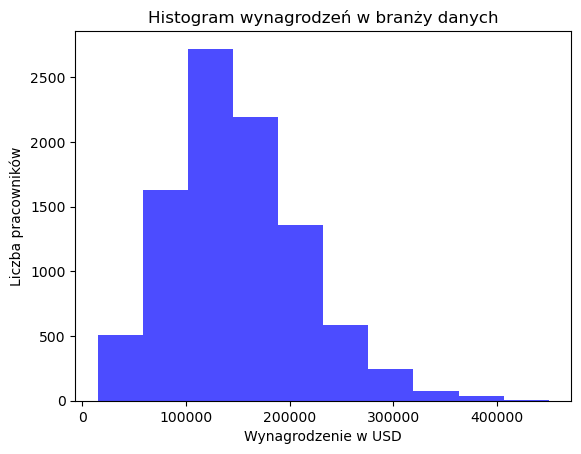

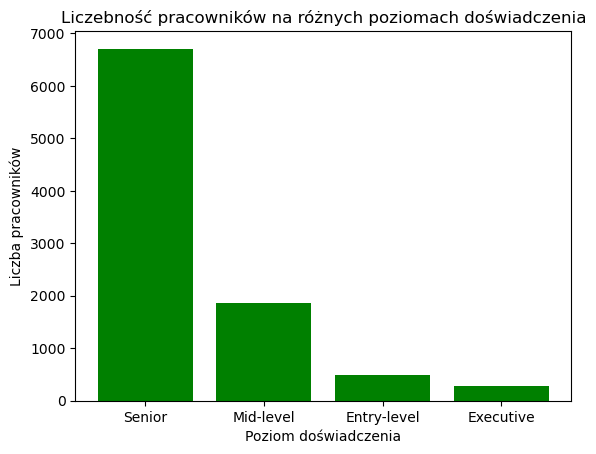

In [50]:
# Tworzenie histogramu wynagrodzeń
plt.hist(data['salary_in_usd'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram wynagrodzeń w branży danych')
plt.xlabel('Wynagrodzenie w USD')
plt.ylabel('Liczba pracowników')
plt.show()

# Tworzenie wykresu słupkowego dla liczebności pracowników na różnych poziomach doświadczenia
experience_counts = data['experience_level'].value_counts()
plt.bar(experience_counts.index, experience_counts.values, color='green')
plt.title('Liczebność pracowników na różnych poziomach doświadczenia')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Liczba pracowników')
plt.show()
